# 📌 SQL 서브쿼리(Subquery) 활용하기

### 1. 서브쿼리란?
-	SQL문 안에서 `“부품”처럼 사용되는 SELECT문`
-	쿼리 내부에서 필요한 값을 계산하여 동적으로 활용 가능
-	다른 쿼리창을 열어 별도로 실행할 필요 없이, 하나의 SQL문에서 해결 가능

### 2. 문제 정의
-	상품별 별점 평균(AVG(star))을 구한 후, 전체 상품의 별점 평균보다 낮은 상품만 조회
-	서브쿼리를 사용하여 **전체 상품의 평균 별점을 동적으로 계산**하여 필터링

### 3. SQL 실행 코드 (서브쿼리 사용 전)

```sql
SELECT 
	i.id AS item_id, 
	i.name AS item_name, 
	AVG(r.star) AS avg_star
FROM item AS i
LEFT JOIN review AS r ON i.id = r.item_id
GROUP BY i.id, i.name
HAVING AVG(r.star) < 3.7273 -- 서브 쿼리 사용 X
ORDER BY avg_star ASC;
```

- ✅ AVG(r.star) < 3.7273 → 미리 계산한 평균 별점(3.7273) 이하인 상품 조회
- ✅ 단점: 전체 평균 별점을 별도로 구해야 함

### 4. SQL 실행 코드 (서브쿼리 적용)

```sql
SELECT 
	i.id AS item_id, 
	i.name AS item_name, 
	AVG(r.star) AS avg_star
FROM item AS i
LEFT JOIN review AS r ON i.id = r.item_id
GROUP BY i.id, i.name
HAVING AVG(r.star) < (
	SELECT AVG(star) FROM review
) -- 서브 쿼리 (단, 괄호를 꼭 써줘야 한다.)
ORDER BY avg_star ASC;
```

- ✅ SELECT AVG(star) FROM review → 전체 상품의 평균 별점을 계산하는 서브쿼리
- ✅ HAVING AVG(r.star) < (...) → 서브쿼리 결과(전체 평균 별점)보다 낮은 상품만 필터링
- ✅ 쿼리창을 따로 열지 않아도 한 번의 SQL 실행으로 해결 가능! 🚀

### 5. SQL 실행 결과 예시

| item_id | item_name         | avg_star |
|---------|-----------------|----------|
| 2       | 남성용 밴딩 팬츠 | 0.5      |
| 9       | 기본 반팔 티셔츠 | 2.8      |
| 6       | 여름용 슬랙스   | 3.2      |

- ✅ 별점 평균(3.7273)보다 낮은 상품들만 조회됨
- ✅ 가장 낮은 평가를 받은 상품: 남성용 밴딩 팬츠(0.5점)

### 6. 서브쿼리 정리

| 사용법                     | 설명                                       |
|---------------------------|------------------------------------------|
| `SELECT (서브쿼리)`       | 메인 쿼리에서 특정 값을 동적으로 계산   |
| `HAVING 컬럼 < (서브쿼리)` | 그룹핑된 데이터에 서브쿼리를 조건으로 적용 |
| `WHERE 컬럼 = (서브쿼리)`  | 특정 행을 필터링할 때 서브쿼리 사용       |
| `ORDER BY (서브쿼리)`      | 정렬 기준을 동적으로 설정               |

### 7. 실무 적용 팁
-	서브쿼리를 활용하면 데이터 분석을 한 번의 SQL 실행으로 해결 가능 (단, `괄호`를 꼭 써줘야 한다)
-	필터링(HAVING, WHERE)과 집계(AVG(), COUNT())를 동시에 처리 가능
-	대규모 데이터베이스에서 서브쿼리를 사용할 때는 성능을 고려하여 인덱싱(WHERE, JOIN 활용) 추천(필요한 것만 보자)

➡ 서브쿼리를 활용하면 SQL 쿼리를 더욱 효율적이고 동적으로 작성할 수 있음! 🚀

---

# 📌 SQL에서 SELECT 절에 서브쿼리 활용하기

### 1. 서브쿼리를 SELECT 절에 사용하는 이유
-	기존 테이블에 없는 `새로운 컬럼을 동적으로 추가`
-	최댓값, 평균값 등 전체 데이터를 분석할 수 있는 추가 정보를 포함 가능
-	개별 행과 전체 데이터의 값을 비교하여 유의미한 분석 가능

### 2. 문제 정의
-	상품 테이블(item)에서 개별 상품의 가격과 함께, 전체 상품 중
-	최고 가격(MAX(price))
-	평균 가격(AVG(price))
-	을 추가하여 비교 가능하도록 조회

### 3. SQL 실행 코드 (최고 가격 추가)

```sql
SELECT 
    i.id AS item_id, 
    i.name AS item_name, 
    i.price, 
    (SELECT MAX(price) FROM item) AS max_price
FROM item AS i;
```

- ✅ SELECT MAX(price) FROM item → 전체 상품 중 가장 비싼 가격을 서브쿼리로 추가
- ✅ 각 상품의 가격과 최고 가격을 비교 가능

### 4. SQL 실행 결과 예시 (최고 가격)

| item_id | item_name      | price  | max_price |
|---------|--------------|--------|-----------|
| 1       | 티셔츠        | 25,000 | 70,000    |
| 2       | 청바지        | 40,000 | 70,000    |
| 3       | 코트          | 70,000 | 70,000    |
| 4       | 운동화        | 55,000 | 70,000    |

- ✅ 각 상품의 가격과 전체 상품 중 최고 가격(70,000원)을 비교 가능

### 5. SQL 실행 코드 (평균 가격 추가)

```sql
SELECT 
    i.id AS item_id, 
    i.name AS item_name, 
    i.price, 
    (SELECT AVG(price) FROM item) AS avg_price
FROM item AS i;
```

- ✅ SELECT AVG(price) FROM item → 전체 상품의 평균 가격을 서브쿼리로 추가
- ✅ 각 상품의 가격과 평균 가격을 비교 가능

### 6. SQL 실행 결과 예시 (평균 가격)

| item_id | item_name      | price  | avg_price  |
|---------|--------------|--------|------------|
| 1       | 티셔츠        | 25,000 | 38,666.67  |
| 2       | 청바지        | 40,000 | 38,666.67  |
| 3       | 코트          | 70,000 | 38,666.67  |
| 4       | 운동화        | 55,000 | 38,666.67  |

- ✅ 각 상품의 가격과 전체 평균 가격(38,666원)을 비교 가능
- ✅ 평균보다 저렴한 상품(티셔츠)과 평균보다 비싼 상품(코트) 구별 가능

### 7. SQL 정리

| 사용법                      | 설명                                    |
|----------------------------|--------------------------------------|
| `SELECT (서브쿼리)`        | 특정 값을 계산하여 새로운 컬럼으로 추가 |
| `MAX(컬럼명)`              | 특정 컬럼의 최댓값 반환                 |
| `AVG(컬럼명)`              | 특정 컬럼의 평균값 반환                 |
| `AS 별칭`                 | 서브쿼리 결과에 Alias(별칭) 부여         |

### 8. 실무 적용 팁
-	가격, 판매량, 주문량 등의 집계값을 실시간으로 추가하여 데이터 비교 가능
-	서브쿼리를 사용하면 여러 쿼리를 실행하지 않고도 통계 정보를 포함 가능
-	기존 테이블에 없는 컬럼을 유동적으로 추가하여 가독성 및 분석 용이성 향상

➡ SQL 서브쿼리를 활용하면 기존 데이터에 통계 정보를 추가하여 보다 직관적인 데이터 분석이 가능! 🚀

---

# 📌 WHERE 절에서 서브쿼리 활용하기

### 1. 서브쿼리를 WHERE 절에서 사용하는 이유
-	데이터를 필터링할 때 `동적으로 값을 계산`하여 비교 가능
-	최고가, 최저가, 평균가 등의 값을 미리 계산하지 않고도 즉시 활용 가능
-	별도의 쿼리창을 열지 않아도 하나의 SQL문에서 해결 가능

### 2. 문제 정의
-	상품 테이블(item)에서
-	전체 평균 가격보다 비싼 상품 조회
-	최고가 상품 조회
-	최저가 상품 조회

### 3. SQL 실행 코드 (평균 가격보다 높은 상품 조회)

```sql
SELECT 
    i.id AS item_id, 
    i.name AS item_name, 
    i.price
FROM item AS i
WHERE i.price > (SELECT AVG(price) FROM item);
```

- ✅ SELECT AVG(price) FROM item → 전체 상품의 평균 가격을 계산하는 서브쿼리
- ✅ WHERE i.price > (...) → 평균 가격보다 비싼 상품만 조회

### 4. SQL 실행 결과 예시 (평균 가격보다 비싼 상품)

| item_id | item_name       | price  |
|---------|---------------|--------|
| 3       | 체크무늬 롱코트 | 110,000 |
| 4       | 캐주얼 자켓   | 78,000  |
| 6       | 남성용 정장    | 95,000  |

- ✅ 평균 가격(38,666원)보다 비싼 상품만 필터링됨

### 5. SQL 실행 코드 (최고가 상품 조회)

```sql
SELECT 
    i.id AS item_id, 
    i.name AS item_name, 
    i.price
FROM item AS i
WHERE i.price = (SELECT MAX(price) FROM item);
```

- ✅ SELECT MAX(price) FROM item → 전체 상품 중 최고 가격을 구하는 서브쿼리
- ✅ WHERE i.price = (...) → 최고가 상품만 조회

### 6. SQL 실행 결과 예시 (최고가 상품)

| item_id | item_name       | price  |
|---------|---------------|--------|
| 3       | 체크무늬 롱코트 | 110,000 |

- ✅ 코팡에서 가장 비싼 상품은 체크무늬 롱코트(110,000원)

### 7. SQL 실행 코드 (최저가 상품 조회)

```sql
SELECT 
    i.id AS item_id, 
    i.name AS item_name, 
    i.price
FROM item AS i
WHERE i.price = (SELECT MIN(price) FROM item);
```

- ✅ SELECT MIN(price) FROM item → 전체 상품 중 최저 가격을 구하는 서브쿼리
- ✅ WHERE i.price = (...) → 최저가 상품만 조회

### 8. SQL 실행 결과 예시 (최저가 상품)

| item_id | item_name           | price  |
|---------|-------------------|--------|
| 10      | 남성용 순면 러닝   | 9,000  |

- ✅ 코팡에서 가장 저렴한 상품은 남성용 순면 러닝(9,000원)

### 9. SQL 정리

| 사용법                     | 설명                                   |
|---------------------------|----------------------------------|
| `WHERE 컬럼 > (서브쿼리)` | 특정 값보다 큰 데이터 필터링     |
| `WHERE 컬럼 = (서브쿼리)` | 특정 값과 일치하는 데이터 조회   |
| `MAX(컬럼명)`              | 특정 컬럼의 최댓값 반환         |
| `MIN(컬럼명)`              | 특정 컬럼의 최솟값 반환         |
| `AVG(컬럼명)`              | 특정 컬럼의 평균값 반환         |

### 10. 실무 적용 팁
-	특정 조건을 만족하는 데이터(최고 매출 고객, 최저 판매 상품 등)를 쉽게 필터링 가능
-	WHERE 절에서 서브쿼리를 활용하면 동적인 데이터 분석이 가능
-	가격 비교, 인기 상품 조회, 이상치 탐색 등의 다양한 분석 가능

➡ 서브쿼리를 활용하면 단일 SQL문으로 보다 효과적인 데이터 분석 가능! 🚀

---

# 📌 다중 행을 반환하는 서브쿼리 활용하기

### 1. 서브쿼리의 새로운 개념: “하나의 컬럼, 여러 개의 행 반환 가능”
-	기존 서브쿼리는 단일 값(최댓값, 평균값 등)을 반환했음
-	하지만 특정 조건을 만족하는 `여러 개의 값(1컬럼의 여러 로우의 값)을 반환하는 서브쿼리`도 존재
(예: 리뷰가 3개 이상 달린 모든 상품 ID 조회)
-	이 경우, IN 연산자를 활용하여 메인 쿼리에서 특정 행을 필터링 가능

### 2. 문제 정의
-	상품 테이블(item)에서
-	리뷰 개수가 3개 이상 달린 상품만 조회
-	서브쿼리를 사용하여 review 테이블에서 조건을 만족하는 item_id를 반환

### 3. SQL 실행 코드 (서브쿼리 활용)

```sql
SELECT 
    i.id AS item_id, 
    i.name AS item_name, 
    i.price
FROM item AS i
WHERE i.id IN (
    SELECT item_id 
    FROM review 
    GROUP BY item_id 
    HAVING COUNT(*) >= 3
);
```

- ✅ 서브쿼리(SELECT item_id FROM review ...)
    -	review 테이블에서 item_id를 기준으로 그룹핑
    -	각 item_id별 리뷰 개수를 세서 3개 이상인 경우만 필터링

- ✅ 메인 쿼리(SELECT * FROM item WHERE i.id IN (...))
    -	item 테이블에서 서브쿼리가 반환한 item_id를 포함하는 상품들만 조회

### 4. SQL 실행 결과 예시 (리뷰 3개 이상 달린 상품 조회)

| item_id | item_name             | price  |
|---------|----------------------|--------|
| 1       | 남성용 정장          | 95,000 |
| 5       | 캐주얼 블레이저       | 78,000 |
| 7       | 스니커즈 화이트       | 55,000 |

- ✅ 리뷰가 3개 이상 달린 상품들만 조회됨
- ✅ 기존의 단일 값 반환 서브쿼리와 다르게, 여러 개의 item_id를 반환함

### 5. IN 연산자를 활용한 서브쿼리

| 사용법                           | 설명                                    |
|--------------------------------|-------------------------------------|
| `WHERE 컬럼 IN (서브쿼리)`       | 서브쿼리에서 반환한 여러 값 중 하나라도 포함되면 조회 |
| `WHERE 컬럼 NOT IN (서브쿼리)`   | 서브쿼리에서 반환한 값에 해당하지 않는 데이터만 조회 |
| `GROUP BY 컬럼`                 | 특정 컬럼을 기준으로 그룹핑         |
| `HAVING COUNT(*) >= N`         | 그룹별 개수가 특정 조건을 충족하는 경우만 필터링 |

### 6. (참고) NOT IN 연산자 활용 예시 (리뷰가 3개 미만인 상품 조회)

```sql
SELECT 
    i.id AS item_id, 
    i.name AS item_name, 
    i.price
FROM item AS i
WHERE i.id NOT IN (
    SELECT item_id 
    FROM review 
    GROUP BY item_id 
    HAVING COUNT(*) >= 3
);
```

- ✅ 리뷰가 3개 미만인 상품들만 조회

### 7. 실무 적용 팁
-	특정 기준을 만족하는 데이터를 필터링할 때 유용함
(예: 특정 수량 이상 주문된 상품 조회, 인기 게시글 조회 등)
-	IN과 NOT IN 연산자를 함께 활용하여 다양한 분석 가능
(예: 많이 리뷰된 상품 vs. 리뷰가 적은 상품 비교)
-	서브쿼리를 활용하면 조인 없이도 특정 조건을 만족하는 데이터만 손쉽게 필터링 가능

➡ 단일 값이 아닌 다중 행을 반환하는 서브쿼리를 활용하면 더욱 유연한 데이터 분석 가능! 🚀

---

# 📌 FROM 절에서 서브쿼리 활용하기 (Derived Table)

### 1. FROM 절에서 서브쿼리를 사용하는 이유
-	기존 테이블을 가공하여 새로운 테이블 형태(파생 테이블, Derived Table)로 사용
	- `주의 : 파생 테이블에는 무조건 alias가 붙어야 한다!`
-	조회하고자 하는 데이터를 미리 요약하여 보다 직관적인 분석 가능
-	SQL 내에서 일시적인 가상의 테이블을 생성하여 활용 가능

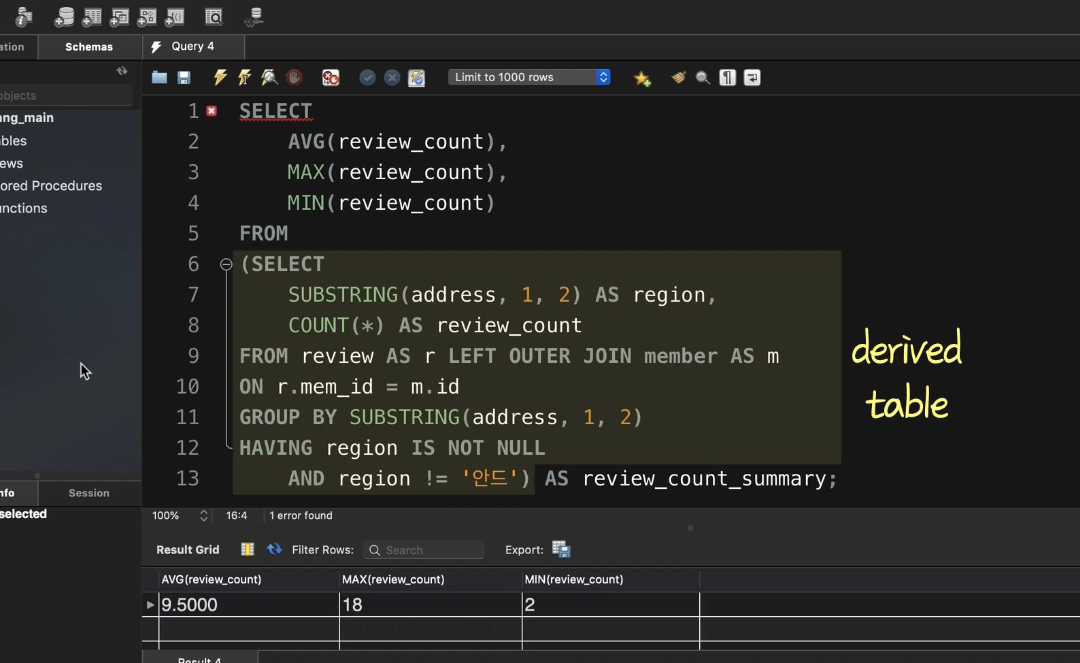

### 2. 문제 정의
-	각 지역별 리뷰 수를 구하는 서브쿼리를 생성
-	이 서브쿼리를 FROM 절에서 사용하여 지역별 리뷰 개수의 평균, 최댓값, 최솟값을 계산

### 3. SQL 실행 코드 (FROM 절에서 서브쿼리 활용)

```sql
SELECT 
    AVG(region_review_count) AS avg_review_count, 
    MAX(region_review_count) AS max_review_count, 
    MIN(region_review_count) AS min_review_count
FROM (
    SELECT 
        SUBSTRING(m.address, 1, 2) AS region, 
        COUNT(r.id) AS region_review_count
    FROM review AS r
    JOIN member AS m ON r.mem_id = m.id
    WHERE m.address IS NOT NULL 
      AND m.address != '안드'
    GROUP BY region
) AS review_count_summary;
```

- ✅ 서브쿼리(Derived Table)의 역할
	-	review 테이블과 member 테이블을 조인하여 region(지역)을 기준으로 그룹핑
	-	각 지역별 리뷰 개수를 계산한 region_review_count 컬럼을 생성
	-	이 서브쿼리를 review_count_summary라는 Derived Table로 활용

- ✅ 메인 쿼리에서 수행하는 작업
	-	review_count_summary 테이블을 기반으로
	-	평균 리뷰 개수 (AVG(region_review_count))
	-	최대 리뷰 개수 (MAX(region_review_count))
	-	최소 리뷰 개수 (MIN(region_review_count))
	→ 지역별 리뷰 수를 요약하여 분석

### 4. SQL 실행 결과 예시

| avg_review_count | max_review_count | min_review_count |
|------------------|------------------|------------------|
| 9.5              | 18               | 2               |

- ✅ 지역별 평균 리뷰 개수: 9.5개
- ✅ 가장 리뷰가 많이 달린 지역: 18개
- ✅ 가장 리뷰가 적게 달린 지역: 2개

5. FROM 절에서 서브쿼리(파생 테이블, Derived Table) 활용법

| 사용법                              | 설명                                      |
|------------------------------------|---------------------------------------|
| `FROM (서브쿼리) AS 별칭`           | 서브쿼리를 통해 생성된 가상의 테이블 활용 |
| `JOIN (서브쿼리) AS 별칭 ON ...`    | 서브쿼리를 다른 테이블과 조인 가능        |
| `AVG(컬럼)`                        | 특정 컬럼의 평균값 계산                  |
| `MAX(컬럼)`                        | 특정 컬럼의 최댓값 계산                  |
| `MIN(컬럼)`                        | 특정 컬럼의 최솟값 계산                  |

6. 실무 적용 팁
-	데이터를 미리 가공하여 분석에 적합한 형태로 변환
-	필요한 데이터만 추출하여 효율적인 SQL 실행 가능
-	Derived Table을 활용하면 기존 테이블을 건드리지 않고도 새로운 데이터를 생성 가능

➡ FROM 절에서 서브쿼리를 활용하면 더욱 유연한 데이터 분석 및 최적화가 가능! 🚀

---

# 📌 서브쿼리 중첩 (Nested Subquery) 활용하기

### 1. 서브쿼리 중첩(Nested Subquery)란?
-	서브쿼리 안에 또 다른 서브쿼리를 사용하는 것
-	더 정교한 데이터 필터링 가능
-	SQL 문이 길어지고 복잡해지는 단점 존재

### 2. 문제 정의
-	상품별 별점 평균을 구한 후
-	별점 평균값이 가장 높은 상품만 조회

### 3. SQL 실행 코드 (서브쿼리 중첩 활용)

```sql
SELECT 
    final.item_id, 
    final.item_name, 
    final.avg_star
FROM (
    -- (1) 상품별 별점 평균을 구하는 서브쿼리 (Derived Table)
    SELECT 
        i.id AS item_id, 
        i.name AS item_name, 
        AVG(r.star) AS avg_star
    FROM item AS i
    JOIN review AS r ON i.id = r.item_id
    GROUP BY i.id, i.name
) AS final
WHERE final.avg_star = (
    -- (2) 별점 평균 최댓값을 구하는 서브쿼리
    SELECT MAX(avg_star) FROM (
        SELECT AVG(r.star) AS avg_star
        FROM review AS r
        JOIN item AS i ON r.item_id = i.id
        GROUP BY i.id
    ) AS avg_table
);
```

- ✅ 서브쿼리 1 (Derived Table: final)
-	상품별 별점 평균을 구함
-	새로운 Derived Table (final)을 생성하여 활용

- ✅ 서브쿼리 2 (avg_table)
-	상품별 별점 평균만 추출하여 최댓값을 구함
-	이 최댓값과 final.avg_star가 동일한 상품만 조회

### 4. SQL 실행 결과 예시

| item_id | item_name            | avg_star |
|---------|----------------------|----------|
| 10      | 캐주얼 오버핏 후드티 | 5.0      |
| 15      | 체크무늬 셔츠        | 5.0      |
| 22      | 스니커즈 블랙        | 5.0      |

- ✅ 별점 평균값이 가장 높은 상품들만 조회됨
- ✅ 여러 개의 상품이 동일한 최고 평점을 가질 경우 모두 출력됨

### 5. 서브쿼리 중첩(Nested Subquery) 패턴

| 패턴                          | 설명                                      |
|-----------------------------|----------------------------------------|
| `SELECT ... WHERE 컬럼 = (서브쿼리)` | 서브쿼리의 결과와 일치하는 행만 필터링 |
| `SELECT ... WHERE 컬럼 IN (서브쿼리)` | 서브쿼리에서 반환한 여러 값 중 하나라도 포함되면 필터링 |
| `SELECT ... WHERE 컬럼 = (SELECT MAX(컬럼) FROM 서브쿼리)` | 특정 컬럼의 최댓값과 일치하는 데이터 필터링 |

### 6. 서브쿼리 중첩의 문제점

- ❌ SQL 문이 너무 길어지고 가독성이 떨어짐
- ❌ 반복적인 서브쿼리가 많아 실행 속도가 저하될 수 있음
- ✅ 다음 챕터에서 더 간단한 해결 방법을 배워보자! 🚀

---

# 📌 뷰(View)를 활용한 SQL 최적화

### 1. 뷰(View)란?
-	원래의 테이블을 가공하여 가상 테이블로 저장하는 기능
-	데이터베이스 내에서 하나의 테이블처럼 사용 가능
-	복잡한 SQL문을 간결하게 관리할 수 있음
-	조회할 때마다 뷰를 실행하여 데이터를 가져옴 (실제 데이터를 복사하는 것이 아님)

### 2. 뷰(View) 활용 전후 비교

| 비교 항목     | 서브쿼리 중첩 사용 | `뷰(View) 사용` |
|--------------|----------------|-------------|
| **SQL 문 길이** | 매우 길고 복잡 | 짧고 간결 |
| **가독성** | 낮음 (중첩된 서브쿼리) | 높음 (직관적인 SQL 문) |
| **반복성 문제** | 동일한 서브쿼리를 여러 번 작성해야 함 | 뷰를 한 번 정의하고 간단하게 사용 가능 |
| **실행 속도** | 서브쿼리를 매번 실행해야 함 | 실행 최적화 가능 |

### 3. 뷰 생성 SQL 코드

```sql
CREATE VIEW three_tables_joined AS
SELECT 
    i.id AS item_id, 
    i.name AS item_name, 
    AVG(r.star) AS avg_star,
    COUNT(r.star) AS review_count
FROM item AS i
JOIN review AS r ON i.id = r.item_id
GROUP BY i.id, i.name;
```

- ✅ CREATE VIEW 뷰이름 AS (SELECT문);
- ✅ 별점 평균과 리뷰 개수를 미리 계산한 가상 테이블(뷰)을 생성
- ✅ three_tables_joined 뷰를 사용하여 짧고 간결한 SQL 작성 가능

### 4. 뷰를 활용한 데이터 조회

```sql
SELECT * FROM three_tables_joined;
```

- ✅ 기존에는 복잡한 서브쿼리를 매번 실행해야 했지만,
- ✅ 이제는 단순한 테이블 조회처럼 사용할 수 있음

### 5. 뷰를 활용한 최적화된 SQL

- 🚀 별점 평균이 가장 높은 상품 조회

```sql
SELECT * 
FROM three_tables_joined 
WHERE avg_star = (SELECT MAX(avg_star) FROM three_tables_joined);
```

- ✅ 최고 별점 상품 조회
- ✅ 중첩 서브쿼리 없이 간결하게 작성 가능

- 🚀 최고 별점 + 리뷰 수가 가장 많은 상품 조회

```sql
SELECT * 
FROM three_tables_joined 
WHERE avg_star = (SELECT MAX(avg_star) FROM three_tables_joined)
-- WHERE review_count = (SELECT MAX(review_count) FROM three_tables_joined)
ORDER BY review_count DESC
LIMIT 1;
```

- ✅ 최고 별점을 받은 상품 중 리뷰 개수가 가장 많은 상품 조회
- ✅ ORDER BY review_count DESC를 사용하여 가장 인기 있는 상품을 선택

### 6. 뷰(View)의 장점과 단점

| 항목 | 설명 |
|------|------|
| **장점** | - SQL 문이 간결해지고 유지보수가 쉬워짐 <br>- 반복되는 서브쿼리를 한 번만 정의하고 재사용 가능 <br>- 복잡한 쿼리를 직관적인 SQL로 변환 가능 |
| **단점** | - 실행 시마다 원본 테이블을 참조해야 하므로 성능 이슈 발생 가능 <br>- 데이터 변경이 필요한 경우 뷰 자체를 수정할 수 없음 (뷰는 가상 테이블이므로) |

### 7. 뷰(View) 활용 전략

- ✅ 반복해서 사용하는 SQL을 뷰로 저장하여 간편하게 사용
- ✅ 여러 테이블을 조인한 복잡한 쿼리를 뷰로 정의하여 SQL 가독성 향상
- ✅ 자주 사용하는 데이터 분석용 쿼리를 뷰로 관리하면 업무 효율성이 증가

- 🎯 결론: 뷰(View)를 활용하면 SQL이 더 강력해진다!

- SQL을 잘 다룰 줄 아는 사람은 `서브쿼리`를 잘 활용하지만, SQL을 더 효율적으로 다루는 사람은 `뷰(View)`를 적극적으로 사용합니다! 🚀

---